<a href="https://colab.research.google.com/github/MarinCervinschi/DeepLearning/blob/main/Lab00/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import numpy as np

In [54]:
# Generate synthetic data
X = torch.linspace(0, 1, 100).reshape(-1, 1)
y = 3 * X + 2 + 0.1 * torch.randn(X.size())

# Initialize weights and bias
#w = torch.randn(1, requires_grad=True)
#b = torch.randn(1, requires_grad=True)
# Load the parameters
checkpoint = torch.load('linear_regression_no_nn.pth')
w = checkpoint['w']
b = checkpoint['b']

In [55]:
# Define the forward pass
def forward(X):
  return w * X + b

# Define the loss function
def mse_loss(y_pred, y):
  return ((y_pred - y) ** 2).mean()

# Training loop
learning_rate = 0.1
for epoch in range(100):
  # Forward pass
  predictions = forward(X)
  loss = mse_loss(predictions, y)
  # Backward pass
  loss.backward()
  # Update parameters
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    # Zero gradients
    w.grad.zero_()
    b.grad.zero_()

In [56]:
# Evaluate the model
with torch.no_grad():
  predictions = forward(X)
  print(f"Final Loss: {mse_loss(predictions, y).item()}")

Final Loss: 0.010206090286374092


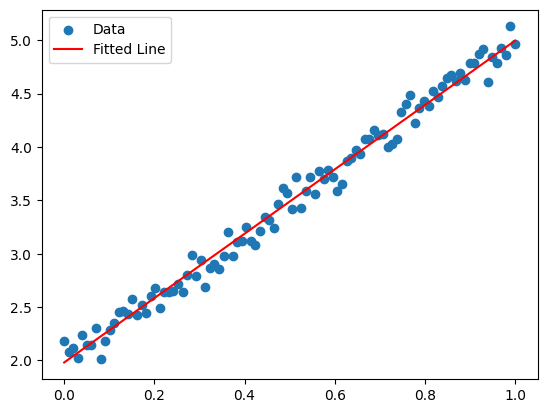

In [57]:
import matplotlib.pyplot as plt
# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Data')
plt.plot(X.numpy(), predictions.numpy(), label='Fitted Line', color='red')
plt.legend()
plt.show()

In [58]:
# Save the parameters
torch.save({'w': w, 'b': b}, 'linear_regression_no_nn.pth')

In [48]:
# Load the parameters
checkpoint = torch.load('linear_regression_no_nn.pth')
w = checkpoint['w']
b = checkpoint['b']

print(f"w = {w}; b = {b}")

w = tensor([2.9569], requires_grad=True); b = tensor([2.0328], requires_grad=True)
